# Modelling Gradient Descent

Here we will create a simple algorithm that uses gradient descent to optimise a simple linear regression model. 
The data are fetched from the [BOM](http://www.bom.gov.au/climate/data/index.shtml) and show temperatures for the Sydney (Kinsford Smith) and Newcastle (Williamstown RAAF) airports. 

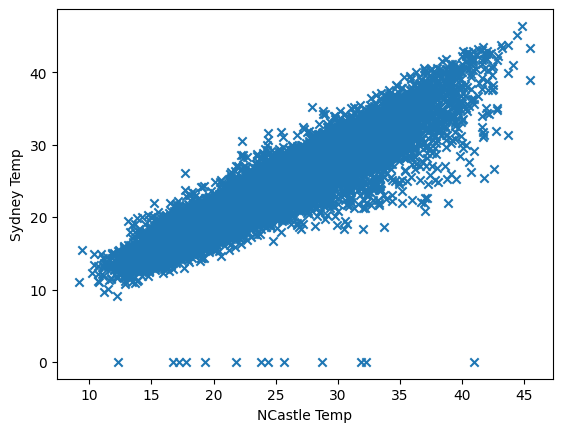

,DDMMYYYY,MaxTempNewcastleAirport,MaxTempSydneyAirport
252,19420910,18.6,16.2
253,19420911,18.8,17.1
254,19420912,18.9,14.9
255,19420913,19.6,20.2
256,19420914,23.8,24.3


In [1]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
fulldataset = pd.read_csv('../datasets/AirportTemps.csv')
dataset = fulldataset.dropna()

# Plot the data (to observe correlation)
plt.scatter(dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
plt.xlabel('NCastle Temp')
plt.ylabel('Sydney Temp')
plt.show()

# See a sample of raw data
dataset.head()

Here's the beginnings of an OOP approach. It plots the existing data in blue and the predicted line in red. 


predicting with m=0, and b = 0


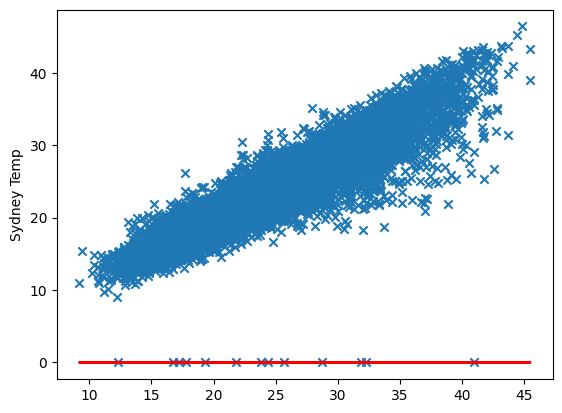

predicting with m=0, and b = 0
Predicted mse=531.2686256339159
predicting with m=0, and b = 15.938058769017477
Predicted mse=67.50935004964161
Current loss = 531.2686256339159, loss_if_b_increased = 67.50935004964161
Increase by 15.938058769017477
predicting with m=0, and b = 15.938058769017477


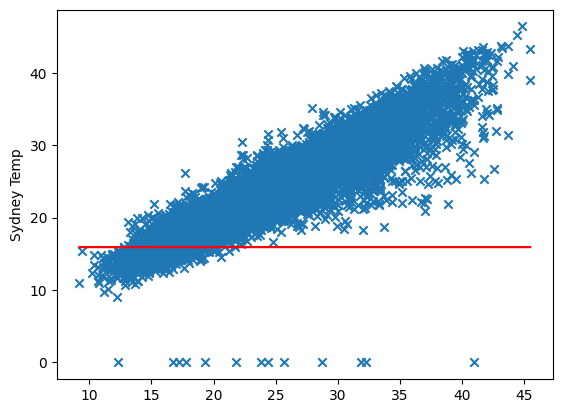

predicting with m=0, and b = 15.938058769017477
Predicted mse=67.50935004964161
predicting with m=0, and b = 17.963339270506726
Predicted mse=44.95934676763845
Current loss = 67.50935004964161, loss_if_b_increased = 44.95934676763845
Increase by 2.0252805014892483
predicting with m=0, and b = 17.963339270506726


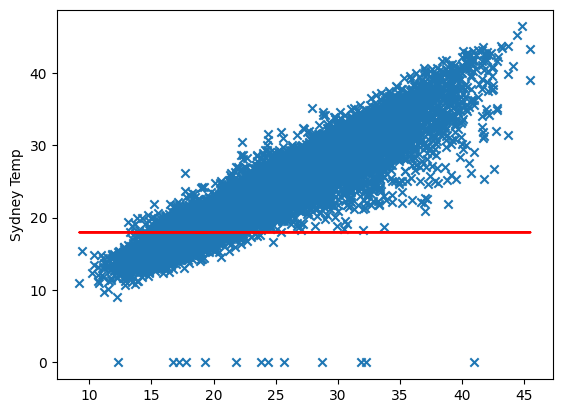

predicting with m=0, and b = 17.963339270506726
Predicted mse=44.95934676763845
predicting with m=0, and b = 19.31211967353588
Predicted mse=34.4925399028914
Current loss = 44.95934676763845, loss_if_b_increased = 34.4925399028914
Increase by 1.3487804030291535
predicting with m=0, and b = 19.31211967353588


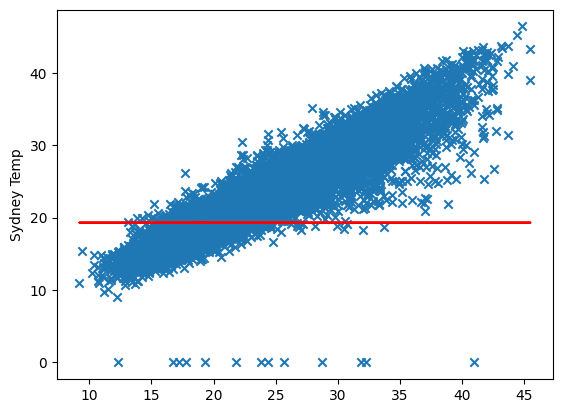

predicting with m=0, and b = 19.31211967353588
Predicted mse=34.4925399028914
predicting with m=0, and b = 20.34689587062262
Predicted mse=28.928916386288794
Current loss = 34.4925399028914, loss_if_b_increased = 28.928916386288794
Increase by 1.034776197086742
predicting with m=0, and b = 20.34689587062262


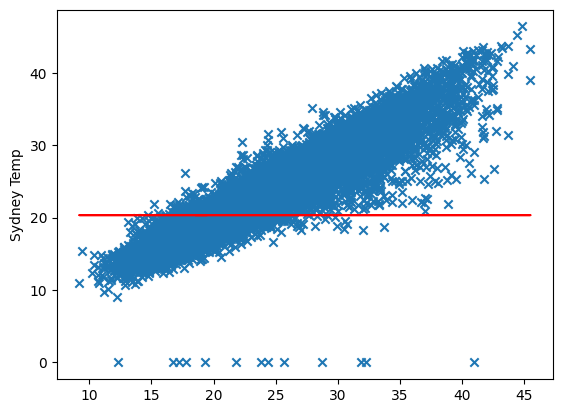

predicting with m=0, and b = 20.34689587062262
Predicted mse=28.928916386288794
predicting with m=0, and b = 21.214763362211286
Predicted mse=25.913944211129426
Current loss = 28.928916386288794, loss_if_b_increased = 25.913944211129426
Increase by 0.8678674915886638


In [4]:
class Model():
    def __init__(self, data):
        self.dataset = data
        self.m = 0
        self.b = 0
        self.learning_rate = .03
        self.cycles = 5

    def plot(self):
        predictions = self.predict()
        plt.scatter(self.dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
        plt.plot(self.dataset['MaxTempNewcastleAirport'],predictions, 'r')
        plt.ylabel('Sydney Temp')
        plt.show()

    def predict(self, m=None, b=None):
        if not m: 
            m = self.m
        if not b:
            b = self.b
        print(f'predicting with m={m}, and b = {b}')
        predictions = [x * m + b for x in dataset['MaxTempNewcastleAirport']]
        return predictions
    
    def loss(self, m=None, b=None):
        if not m: #This allows us to pass in m and b if desired, using the model's existing m and b as a fallback. 
            m = self.m
        if not b:
            b = self.b
        predictions = self.predict(m=m,b=b)
        loss = self.dataset['MaxTempSydneyAirport'] - predictions
        loss_squared = loss * loss
        mse = loss_squared.mean()
        print(f'Predicted mse={mse}')
        return mse
    
    def decide_on_change_in_b(self):
        current_loss = self.loss()
        delta = current_loss * self.learning_rate
        loss_if_b_increased = self.loss(b=(self.b + delta))
        print(f'Current loss = {current_loss}, loss_if_b_increased = {loss_if_b_increased}')

        if loss_if_b_increased < current_loss:
            print(f'Increase by {delta}')
            return delta
        else:
            return 0
    
    def decide_on_change_in_m(self):
        return 0
    
    
    def train(self):
        for i in range(self.cycles):
            self.plot()
            self.m = self.m + self.decide_on_change_in_m()
            self.b = self.b + self.decide_on_change_in_b()

model = Model(dataset)
model.train()
